# Lab 5: Implementing a simple perceptron. Introduction to neural networks with PyTorch.

In this lab, we will get familiar with the concept of a **perceptron**, implement it in `numpy` and fit it to some data with the use of **gradient descent algorithm**. On the basis of a perceptron, we will explore feed-forward neural networks and learn how to implement them easily using `torch`. We will go over the data loading process, the training loop, and the evaluation of a trained neural network.

---

## Reading material

<center>
<img src="imgs/3blue1brown.png" width="600">
</center>

</br>

**Grant Sanderson's 3Blue1Brown video series on neural networks:**

* [But what is a neural network?](https://www.youtube.com/watch?v=aircAruvnKk)
* [Gradient descent, how neural networks learn](https://www.youtube.com/watch?v=IHZwWFHWa-w)
* [What is backpropagation really doing?](https://www.youtube.com/watch?v=Ilg3gGewQ5U)
* [Backpropagation calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8)



One of the fundamental algorithms used to train neural networks is the **gradient descent algorithm**. Before we dive into neural networks, let's first understand how gradient descent works.

## Gradient descent

The **gradient descent algorithm** is an optimization algorithm, which means it conducts a search for an argument $x$ of a function $f$ that minimizes $f(x)$. The function that we are trying to minimize in context of deep learning is called the **loss function** which measures how far the model's predictions are from the true values. The arguments of the loss function are the **model's parameters**, and thus the goal of training a neural network is to find the parameters that minimize the loss function.

**Gradient is a vector that points in the direction of the steepest increase of the function.** Its components are the partial derivatives of the function with respect to each of its parameters.

The gradient descent algorithm works by iteratively updating the parameters in the direction of the negative gradient. The size of the update is determined by a hyperparameter called the **learning rate**. The learning rate controls how fast or slow we want to move towards the minimum of the function.

The update rule for gradient descent is given by the following formula:

$$ x_{n+1} = x_n - \alpha \cdot f'(x_n) $$
where:
* $x_n$ is the current value of the parameter,
* $x_{n+1}$ is the updated value of the parameter,
* $\alpha$ is the learning rate (a hyperparameter that you can tune).
* $f'(x_n)$ is the derivative (gradient) at the current value of the parameter.


## Exercise 1: Implement the gradient descent algorithm (2 points)

We will try to minimize the function $f(x) = 2x^4 - x^3 - 6x^2 + 4x$

1. Implement the function `f`. Calculate the derivative of the function manually and implement it as the function `grad`.
2. Implement a single step of gradient descent in numpy. The `descent_step` function should take the following arguments:

* `x` - the initial value of the parameter,
* `grad` - the value of the gradient $\frac{df}{dx}$ at the current value of the parameter,
* `alpha` - the learning rate

    The function should return the updated value of the parameter $x$.

3. Starting at $x = 2$, run the gradient descent algorithm for 10 steps. Plot the function $f(x)$ in range $[-2, 2]$ and mark the points $(x, f(x))$ for each step of the algorithm. What do you observe about the convergence of the algorithm for different values of the learning rate?

In [17]:
import numpy as np

def f(x):
    return 2*x**4 - x**3 -6*x**2 + 4*x

def grad(x):
    return 8*x**3 - 3*x**2 - 12*x + 4

def descent_step(x, alpha):
    grad_x = grad(x)
    x_n1 = x - alpha*grad_x
    return x_n1

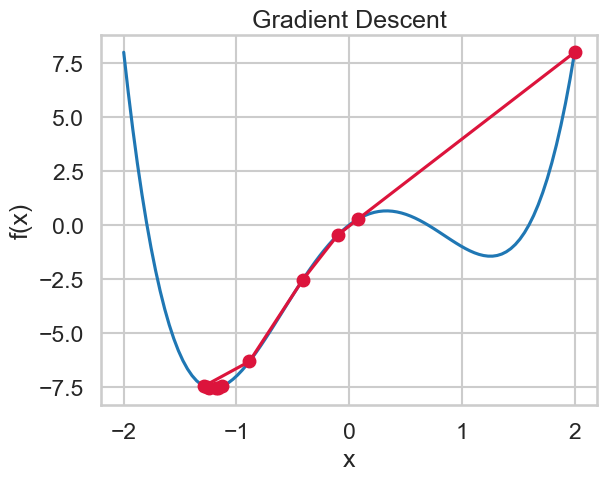

In [18]:
alpha = 0.06

x = 2   # initial value of the parameter
xs = [x]    # we will store the updated x values here

for step in range(10):  # run the algorithm for 10 steps
    x = descent_step(x, alpha)   # update x
    xs.append(x)    # save the updated x

from helpers.lab5 import plot_gradient_descent
plot_gradient_descent(f, xs)

## Perceptron

The simplest form of a neural network is a **perceptron**, which is a single node that takes an input vector $x$ and produces an output value $y$. The perceptron computes a **weighted sum of the inputs** and adds a **bias term**. The result is then passed through an **activation function**, which in our case will be the **sigmoid function**. Sigmoid function squashes the output of the perceptron to the range $[0, 1]$, which will correspond to the probability of the input belonging to the positive class.

The perceptron can be used to solve simple classification problems, as we will see in the next exercise.

<center>
<img src="imgs/perceptron.png" width="400" align="c"/>
</center>

$$ y = f(w^{T}x + b) = f(w_1x_1 + w_2x_2 + ... + w_nx_n + b) $$

where:
* $w$ is the vector of weights,
* $x$ is the input vector,
* $b$ is the bias vector,
* $f$ is the activation function.

The transformation $y = w^{T}x + b$ performed by a perceptron is called an **affine transformation**, and, in the absence of the activation function, it is equivalent to linear regression. With the sigmoid activation function, the perceptron is functionally equivalent to **logistic regression**.

## Loss function

The loss function is a measure of how well the model is performing - it is used to compute the error between the model's predictions $\hat{y}$ and the true values $y$. **The goal of training a neural network is to minimize the loss function.** The loss function takes the model's predictions and the true values as arguments, and returns a single number that represents the error of the model.

### Regression

For regression problems, the **mean squared error (MSE)** is a common loss function - you may remember it from linear regression we implemented earlier in numpy. The MSE is the average of the squared differences between the model's predictions and the true values. It is defined as:

$$ L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$
where:
* $y_i$ is the true value,
* $\hat{y}_i$ is the model's prediction,
* $N$ is the number of samples.

### Classification

For classification problems, the **cross-entropy loss** is a common loss function. It is used when the model's output is a probability distribution over the classes. The cross-entropy loss is the negative log-likelihood of the true class under the model's predicted distribution. It is defined as:

$$ L = -\sum_{i=1}^{n} y_i \log(\hat{y}_i) $$
where:
* $y_i$ is the truth label (0 or 1) of the $i_{th}$ class,
* $\hat{y}_i$ is the model's predicted probability for the true class,
* $n$ is the number of classes.

In the case of binary classification ($n = 2$), the cross-entropy loss can be simplified to:

$$ L = -y \log(\hat{y}) - (1 - y) \log(1 - \hat{y}) $$
where:
* $y$ is the true label (0 or 1),
* $\hat{y}$ is the model's predicted probability for the positive class.

Similarly to MSE, the cross-entropy loss is averaged over all samples in the dataset during training.

$$ L = -\frac{1}{N} \sum_{j=1}^{N} \sum_{i=1}^{n} y_{ij} \log(\hat{y}_{ij}) $$

where:
* $N$ is the number of samples

## Exercise 2: Implement a perceptron (5 points)

In this exercise we will implement a simple perceptron which two inputs $x_1$ and $x_2$ and returns an output $y$. The perceptron should apply the **sigmoid activation function** to the weighted sum of the inputs and the bias. The sigmoid function squashes the output of the perceptron to the range $[0, 1]$, and is defined as:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

The output of the perceptron is then given by:

$$ \hat{y} = \sigma(w_1x_1 + w_2x_2 + b) $$

where:
* $w_1, w_2$ are the weights,
* $b$ is the bias,
* $x_1, x_2$ are the inputs (data),
* $\sigma$ is the sigmoid function defined above.

Implement a `SimplePerceptron` class with the following methods:

* `__init__` - the constructor should take an argument `alpha` (learning rate), save it to an attribute and initialize the attributes $w_1, w_2$ (weights) and the $b$ (bias) with zeros.
* `forward` - the forward method should take the input $x$ and return the output $y$, according to the formula above.
* `loss` - the loss method should take the model prediction $\hat{y}$ and the true value $y$, and return the cross-entropy loss
$$L = -y \log(\hat{y}) - (1 - y) \log(1 - \hat{y})$$
    where $y$ is the true value (0 or 1) and $\hat{y}$ is the model's prediction.

* `get_grad_w1`- the method should return the gradient of the loss with respect to $w_1$.
* `get_grad_w2`- the method should return the gradient of the loss with respect to $w_2$.
* `get_grad_b`- the method should return the gradient of the loss with respect to $b$.
* `update` - the method should update the weights and the bias using the gradients and the learning rate $\alpha$ passed during the initialization.

**Hint:** The gradient of the loss with respect to the weights and the bias can be calculated manually using **the chain rule**. If you find yourself needing help, the derivative of the sigmoid function with is given by:

$$\frac{\partial \sigma}{\partial x} = \sigma(x)(1 - \sigma(x))$$

and the derivative of the loss function is given by:

$$\frac{\partial L}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}$$

In [37]:
import numpy as np
#dL/dw_1 = x_1(y_pred - y)
class SimplePerceptron:

    def __init__(self, alpha):
        # This method should initialize the weights and the bias as zeros
        self.w1 = 0
        self.w2 = 0
        self.b = 0
        self.alpha = alpha
        #jak sie buduje glebokie sieci neuronowe to sie losuje te wagi poczatkowe, my sobie wzielismy 0 tak o

    def sigmoid(self, x):  
        return 1 / (1 + np.exp(-x))
        
    def forward(self, x):   # x is a vector of two elements [x1, x2]
        x = np.array(x)
        w = np.array([self.w1, self.w2])
        y = self.sigmoid(x) * (w @ x + self.b)
        return y
         
    def update(self, x, y):  # y_pred and y are scalars
        
        y_pred = self.forward(x)
        self.w1 = self.w1 - self.alpha * self.get_grad_w1(y_pred, y, x)
        self.w2 = self.w2 - self.alpha * self.get_grad_w2(y_pred, y, x)
        self.b = self.b - self.alpha * self.get_grad_b(y_pred, y)

    def get_grad_w1(self, y_pred, y, x):  # y_pred and y are scalars
        
        return (y_pred - y)*x[0]

    def get_grad_w2(self, y_pred, y, x):  # y_pred and y are scalars
        # This method should return the gradient of the loss with respect to w2
        return (y_pred - y)*x[1]

    def get_grad_b(self, y_pred, y):  # y_pred and y are scalars
        # This method should return the gradient of the loss with respect to b
        return y_pred - y

    def loss(self, y_pred, y):  # y_pred and y are scalars
        eps = 1e-20
        y_pred = np.clip(y_pred, eps, 1 - eps)
        return -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)


## Training the perceptron

We will now train the perceptron on some data. For the sake of clarity, we will choose one of the simplest tasks and make it just execute the logical OR operation. **The OR gate is a simple binary function that returns 1 if at least one of the two inputs is 1, else it returns 0.** It can be thought of as a simple classification problem, where the features are the possible combinations of 0 and 1, and the labels are the corresponding outputs of the OR gate. The truth table for the OR gate is as follows:

<center>
<img src="imgs/or.png" width="500">

C:\Users\Piotr\AppData\Local\Temp\ipykernel_17452\296144503.py:44: RuntimeWarning: divide by zero encountered in log
  return -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)
C:\Users\Piotr\AppData\Local\Temp\ipykernel_17452\296144503.py:44: RuntimeWarning: invalid value encountered in multiply
  return -y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)
C:\Users\Piotr\AppData\Local\Temp\ipykernel_17452\296144503.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\Piotr\AppData\Local\Temp\ipykernel_17452\296144503.py:31: RuntimeWarning: overflow encountered in multiply
  return (y_pred - y)*x[0]
C:\Users\Piotr\AppData\Local\Temp\ipykernel_17452\296144503.py:35: RuntimeWarning: overflow encountered in multiply
  return (y_pred - y)*x[1]
C:\Users\Piotr\AppData\Local\Temp\ipykernel_17452\296144503.py:19: RuntimeWarning: invalid value encountered in matmul
  y = self.sigmoid(x) * (w @ x + self.b)


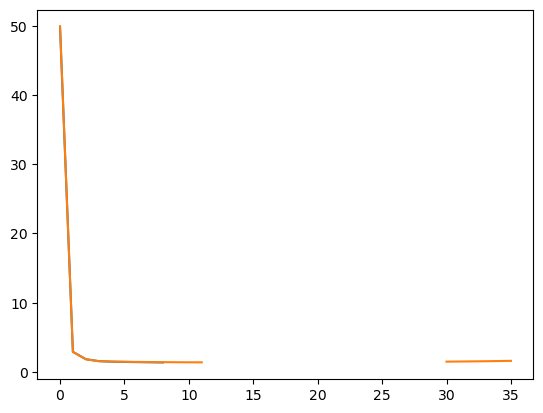

In [38]:
OR_X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])  # possible OR inputs
OR_y = np.array([[1], [1], [1], [0]])  # corresponding outputs

perceptron = SimplePerceptron(alpha=0.2)    # initialize the perceptron

losses = []     # this list will store the loss at each epoch for plotting
EPOCHS = 1000   # number of epochs (iterations over the entire dataset)

for i in range(EPOCHS): 
    epoch_loss = 0  # this variable will accumulate the loss for each epoch
    for X, y in zip(OR_X, OR_y):    # iterate over the dataset (which is 4 samples)
        y_pred = perceptron.forward(X)
        epoch_loss += perceptron.loss(y_pred, y)  # accumulate the loss
        perceptron.update(y_pred, y)   # update the weights and the bias
    
    losses.append(epoch_loss)   # sav
    
        
# plot the loss
import matplotlib.pyplot as plt

plt.plot(losses)

In [21]:
# test the trained model

print("For [1, 1] the model predicts:", perceptron.forward([1, 1]))
print("For [1, 0] the model predicts:", perceptron.forward([1, 0]))
print("For [0, 0] the model predicts:", perceptron.forward([0, 0]))

For [1, 1] the model predicts: None
For [1, 0] the model predicts: None
For [0, 0] the model predicts: None


## Linearly separable data

OR gate is a simple example of a **linearly separable problem**. A problem is linearly separable if it is possible to draw a straight line (or a hyperplane in higher dimensions) that separates the classes. **The OR gate is linearly separable because it is possible to draw a line that separates the inputs that yield 1 from the inputs that yield 0.**

<center>
<img src="imgs/separability.png" width="700">
</center>
<br>

An example of a problem that is not linearly separable is the **XOR gate** (exclusive OR). The XOR gate behaves as the OR gate, but it returns 0 if both inputs are 1.

<center>
<img src="imgs/xor.png" width="500">
</center>
<br>

A single perceptron is not able to solve the XOR problem. If you try to train a perceptron on the XOR data, you will find that the model will not converge to a solution.

## Multi-layer perceptron

A **multi-layer perceptron** (MLP), also known as a **feed-forward neural network**, is a more complex model built by stacking multiple perceptrons together. This architecture allows the model to learn more complex patterns in the data, including those that are not linearly separable (like XOR).

A feed-forward neural network is composed of perceptrons arranged in layers. **A layer is not a physical entity, but a mathematical operation that transforms some input data into some output data.** Each node in a layer is connected to every node in the next layer (thus we often call those network **fully-connected**). The connections between the nodes are represented by weights, which are learned during the training process. Each node calculates a **weighted sum of its inputs and adds a bias term**. The output is then passed through an activation function, which is what really makes a multi-layer perceptron different from simple linear regression. 

A typical feed-forward neural network is composed of three types of layers: the **input layer**, the **hidden layers**, and the **output layer**. The input layer is the first layer of the network and just takes the data to be processed by the network. The hidden layers are there to transform the input data into a form that is more suitable for the output layer. They are called hidden because we usually do not observe their output directly - it is only presented as an input to the next layer of perceptrons. The output layer is the last layer and produces the final output of the network. The output layer usually has a different number of nodes than the hidden layers, depending on the problem we are trying to solve.

**The activation function introduces non-linearity to the model**, and unlocks the ability of MLPs to potentially learn any complex pattern in data. For example, the aforementioned XOR problem can be solved by a network composed of two neurons in the hidden layer. The decision boundary of such a classifier would therefore be constr, which is enough to separate the classes of XOR data in its input space. MLPs are generally able to **approximate any function, given enough layers or neurons**, as described by the [universal approximation theorem.](http://neuralnetworksanddeeplearning.com/chap4.html)

<center>
<img src="imgs/linear-layer.png" width="600" align="c"/>
</center>

## PyTorch

PyTorch is a object-oriented library for deep learning, so in this chapter, we will work with classes and objects a lot. `nn.Module` is the base class for all neural network modules in PyTorch. The neural network itself, the individual layers, the activation functions and the loss functions are subclasses of `nn.Module`.

Pytorch is built around the concept of **automatic differentiation**. This means that the library keeps track of all the operations that are performed on tensors, and can compute the gradients of any tensor with respect to any other tensor. In the previous exercise, we calculated the gradients of the loss function for a single perceptron manually. We really don't want to do this for a neural network with hundreds of neurons and layers. **PyTorch does this for us automatically, which is why it is so popular for deep learning.**

Every instance of `nn.Module` should have a `forward` method. The `forward` method is the actual computation that is done in the network. When you call the network on a batch of inputs, the `forward` method is called with the input data as an argument. It is important to note that all the operations in the `forward` method should be differentiable - this is necessary for the backpropagation algorithm to work. In practice, this means that you should use the functions from the `torch` module to perform computations in the `forward` method. For a list of mathematical operations available in PyTorch, refer to the [documentation](https://pytorch.org/docs/stable/torch.html#math-operations).



## Exercise 2: Implement a simple feed-forward neural network (2 points)

Implement a neural network with one hidden layer and ReLU activation function. The network should have the following architecture:

* Input layer: 1 node for $x$
* Hidden layer: $n$ nodes (pass the number of nodes as an argument to the constructor)
* Output layer: 1 node for $y$

<center>
<img src="imgs/simple-network.png", width="400">
</center>
<br>

In the `forward` method, the input $x$ should be transformed by the hidden layer, followed by the ReLU activation function, to yield $h$. The output $h$ should then be passed through the output layer, which is another linear layer, to get $y$. No activation function is to be applied to the output layer.


In [46]:
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, hidden_size):
        super().__init__() 
        
        self.hidden = nn.Linear(1, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x


## Data batches and stochastic gradient descent (SGD)

When training neural networks using gradient descent algorithms, we do not usually fit the model to all the data at once. Instead, we tend to divide our training set into small chunks, called **batches**, and update model parameters after each batch. If the batches are drawn randomly from the dataset, the method is called **stochastic gradient descent (SGD)**. This approach has proven to be very effective in practice, as it makes the calculations less expensive and the optimization process more robust.

PyTorch library provides a class `torch.utils.data.DataLoader` which, given a dataset, generates the batches for us. The `DataLoader` class allows you to specify the batch size, shuffle the data, and use multiple workers to load the data in parallel to speed up the process.

The usual workflow of preparing the data for training a PyTorch neural network is as follows:
* Load the data from a file or a database.
* Convert the data to PyTorch tensors.
* Create a `Dataset` object from the tensors.
* Create a `DataLoader` object from the `Dataset` object.

Look at the example below to see how to use the `DataLoader` class.



In [40]:
import torch
import pandas as pd
import seaborn as sns
from torch.utils.data import DataLoader
import sklearn

df = pd.read_csv('data/synthetic-data.csv') # load the data

<Axes: xlabel='x', ylabel='y'>

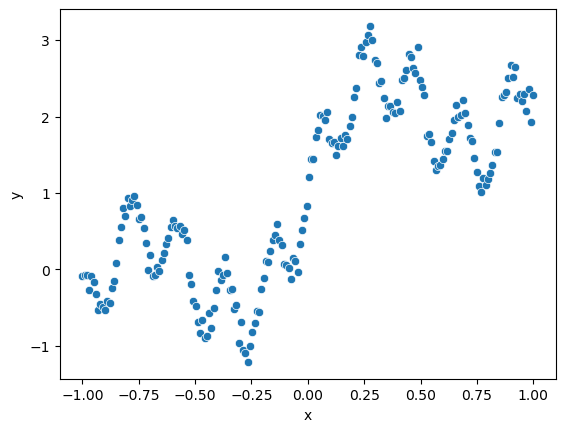

In [41]:
# take a look at the data - we will train the model to predict y from x
sns.scatterplot(data=df, x='x', y='y')

In [42]:
X = torch.tensor(df['x'], dtype=torch.float32).reshape(-1, 1) # convert the features to a tensor
y = torch.tensor(df['y'], dtype=torch.float32).reshape(-1, 1) # convert the target to a tensor

dataset = torch.utils.data.TensorDataset(X, y)  # create a dataset object
train, val = sklearn.model_selection.train_test_split(dataset, test_size=0.2)# split the dataset into training and validation sets

train_loader = DataLoader(train, batch_size=16, shuffle=True)
val_loader = DataLoader(val, batch_size=16, shuffle=False)

print(f'Train batches: {len(train_loader)}')
print(f'Validation batches: {len(val_loader)}')

Train batches: 10
Validation batches: 3


In [43]:
# we can iterate over the dataloader to see how it works

X, y = next(iter(train_loader))

print("X is a tensor of shape:", X.shape)
print("y is a tensor of shape:", y.shape)

#16 przykladow po jednej cesze kazdy i 16 outputow po jednej cesze - zgadza sie

X is a tensor of shape: torch.Size([16, 1])
y is a tensor of shape: torch.Size([16, 1])


In [44]:
# training loop

def train(model, train_loader, val_loader, epochs=100):
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss = nn.MSELoss()
    
    train_loss_history = []
    val_loss_history = []
    
    for epoch in range(epochs):   #1 opoch = 1 pokazanie sieci calego zbioru treningowego
        model.train()   # set the model to training mode (some layers may behave differently in training and evaluation)
        train_loss = 0  # this variable will accumulate the training loss
        
        for X_batch, y_batch in train_loader:   # load data batch-by-batch
            
            optimizer.zero_grad()   # clear the gradients; zawsze trzeba wywolac zeby wyczyscic
            y_pred = model(X_batch)  # forward pass
            batch_loss = loss(y_pred, y_batch) # compute the loss
            batch_loss.backward()   # compute the gradients - obliczenie metodą backward??
            optimizer.step()    # update the weights
            
            train_loss += batch_loss.item() # accumulate training loss
        
        train_loss = train_loss / len(train_loader) # compute the average loss
        train_loss_history.append(train_loss)   # save the loss for plotting
        print(f'Epoch: {epoch}')
        print(f'Train loss: {train_loss}')
                  
        model.eval()    # set the model to evaluation mode
        val_loss = 0    # this variable will accumulate the validation loss
        
        for X_batch, y_batch in val_loader:
            
            y_pred = model(X_batch)
            val_loss += loss(y_pred, y_batch).item()    # accumulate validation loss
            
        val_loss = val_loss / len(val_loader)
        val_loss_history.append(val_loss)   # save the loss for plotting
        print(f'Validation loss: {val_loss}')
        
    return model, train_loss_history, val_loss_history

In [47]:
# initialize and train the model

model = NeuralNetwork(hidden_size=64)

model, train_metrics, val_metrics = train(model, train_loader, val_loader)

Epoch: 0
Train loss: 3.969063639640808
Validation loss: 3.06397811571757
Epoch: 1
Train loss: 3.410152626037598
Validation loss: 2.58599317073822
Epoch: 2
Train loss: 2.926115322113037
Validation loss: 2.1806827783584595
Epoch: 3
Train loss: 2.5132409811019896
Validation loss: 1.8427856763203938
Epoch: 4
Train loss: 2.1809996008872985
Validation loss: 1.5549223025639851
Epoch: 5
Train loss: 1.8850212574005127
Validation loss: 1.3234046697616577
Epoch: 6
Train loss: 1.6315808534622191
Validation loss: 1.1403904557228088
Epoch: 7
Train loss: 1.4446475327014923
Validation loss: 0.9813463886578878
Epoch: 8
Train loss: 1.270741093158722
Validation loss: 0.8576921621958414
Epoch: 9
Train loss: 1.135147935152054
Validation loss: 0.7559626301129659
Epoch: 10
Train loss: 1.0199251174926758
Validation loss: 0.6756996512413025
Epoch: 11
Train loss: 0.9314330577850342
Validation loss: 0.6111253301302592
Epoch: 12
Train loss: 0.8550747454166412
Validation loss: 0.5610316495100657
Epoch: 13
Train lo

Text(0, 0.5, 'MSE Loss')

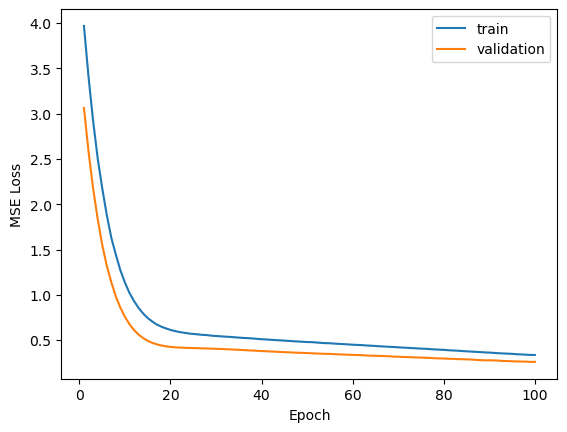

In [48]:
# plot the training and validation loss

import matplotlib.pyplot as plt

plot_df = pd.DataFrame({'epoch': range(1, len(train_metrics) + 1), 
                        'train_loss': train_metrics, 
                        'val_loss': val_metrics})

sns.lineplot(data=plot_df, x='epoch', y='train_loss', label='train')
sns.lineplot(data=plot_df, x='epoch', y='val_loss', label='validation')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')

<Axes: xlabel='x', ylabel='y'>

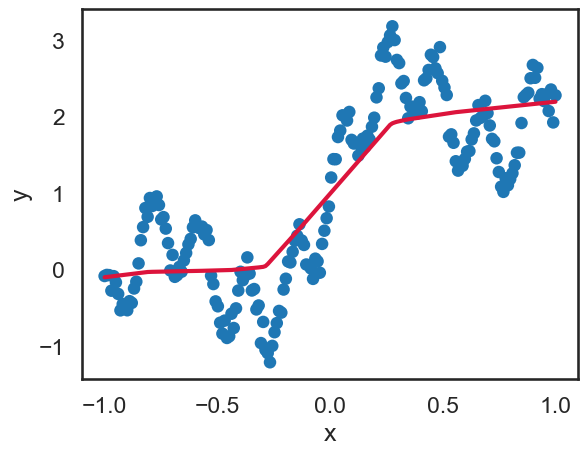

In [49]:
# plot the model's predictions against the true values

X = torch.tensor(df['x'], dtype=torch.float32).reshape(-1, 1)   # convert the features to a tensor
y = model(X)    # get the model's predictions

X = X.flatten().detach().numpy()    # convert the tensors back to numpy arrays
y = y.flatten().detach().numpy()   

plot_df = pd.DataFrame({'x': X, 'y': y})

sns.set_style('white')
sns.set_context('talk')

sns.scatterplot(data=df, x='x', y='y', edgecolor='none') # plot training data
sns.lineplot(data=plot_df, x='x', y='y', c='crimson', lw=3) # plot the model's predictions

## Overfitting

Real-life data is usually noisy and contains patterns that are not relevant to the problem we are trying to solve. We do not want our model to learn these irrelevant patterns, as they will not generalize to unseen data. 

**Overfitting** occurs when the model learns to model noise in the training data instead of modeling the underlying phenomenon. This results in a model that performs **well on training data but poorly on validation or test data.**
<center>
<img src="imgs/overfitting.png", width="600">
</center>
<br>

To reduce the chances of overfitting a neural network, we can do one of the following things, in the order from the least to the most problematic:
* Reduce the complexity of the model (e.g., reduce the number of hidden layers or the number of neurons in each layer).
* Regularize the model (e.g., add dropout layers or L2 regularization).
* Collect more data for training.

**L2 regularization**, also known as **Ridge**, is a method that adds the squared value of the weights to the loss function. This encourages the weights to be small and evenly distributed. L2 regularization is implemented in PyTorch as the `weight_decay` parameter in the optimizer. The `weight_decay` parameter is a positive number that multiplies the L2 norm of the weights and adds it to the loss function. This encourages the weights to be small, which helps to prevent overfitting.

```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)
```

**Dropout layer** is a method that randomly **disables some neurons** in the network during training. This forces the network to learn redundant representations of the data. Dropout is implemented in PyTorch as a layer that you can add to your model.

```python
dropout = nn.Dropout(p=0.5) # p is the probability of dropping a neuron
y = dropout(x)
```